In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df =pd.read_csv('processed.csv')
df

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Temp9am,Temp3pm,RainToday,RainTomorrow,MaxTemp_median,MaxTemp_mean,MaxTemp_random,Evaporation_NAN,Cloud9am_frequent,WindGustDirNew_NAN
0,0,2008-12-01,30,13.4,22.9,0.6,NaN,NaN,13,44.0,...,16.9,21.8,No,0,22.9,22.900000,22.9,1,8.0,W
1,1,2008-12-02,30,7.4,25.1,0.0,NaN,NaN,14,44.0,...,17.2,24.3,No,0,25.1,25.100000,25.1,1,7.0,WNW
2,2,2008-12-03,30,12.9,25.7,0.0,NaN,NaN,15,46.0,...,21.0,23.2,No,0,25.7,25.700000,25.7,1,7.0,WSW
3,3,2008-12-04,30,9.2,28.0,0.0,NaN,NaN,4,24.0,...,18.1,26.5,No,0,28.0,28.000000,28.0,1,7.0,NE
4,4,2008-12-05,30,17.5,32.3,1.0,NaN,NaN,13,41.0,...,17.8,29.7,No,0,32.3,32.300000,32.3,1,7.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,145455,2017-06-21,49,2.8,23.4,0.0,NaN,NaN,0,31.0,...,10.1,22.4,No,0,23.4,23.400000,23.4,1,7.0,E
145456,145456,2017-06-22,49,3.6,25.3,0.0,NaN,NaN,6,22.0,...,10.9,24.5,No,0,25.3,25.300000,25.3,1,7.0,NNW
145457,145457,2017-06-23,49,5.4,26.9,0.0,NaN,NaN,3,37.0,...,12.5,26.1,No,0,26.9,26.900000,26.9,1,7.0,N
145458,145458,2017-06-24,49,7.8,27.0,0.0,NaN,NaN,9,28.0,...,15.1,26.0,No,0,27.0,27.000000,27.0,1,3.0,SE


In [3]:
df.dtypes

Unnamed: 0              int64
Date                   object
Location                int64
MinTemp               float64
MaxTemp               float64
Rainfall              float64
Evaporation           float64
Sunshine              float64
WindGustDir             int64
WindGustSpeed         float64
WindDir9am            float64
WindDir3pm            float64
WindSpeed9am          float64
WindSpeed3pm          float64
Humidity9am           float64
Humidity3pm           float64
Pressure9am           float64
Pressure3pm           float64
Cloud9am              float64
Cloud3pm              float64
Temp9am               float64
Temp3pm               float64
RainToday              object
RainTomorrow            int64
MaxTemp_median        float64
MaxTemp_mean          float64
MaxTemp_random        float64
Evaporation_NAN         int64
Cloud9am_frequent     float64
WindGustDirNew_NAN     object
dtype: object

In [4]:
df1 = df[["WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am", 
         "WindSpeed3pm"]]

In [5]:
df1

,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,44.0,0.254995,3.0,20.0,24.0
1,44.0,0.304511,6.0,4.0,22.0
2,46.0,0.254995,6.0,19.0,26.0
3,24.0,0.160547,14.0,11.0,9.0
4,41.0,0.174196,0.0,7.0,20.0
...,...,...,...,...,...
145455,31.0,0.160547,13.0,13.0,11.0
145456,22.0,0.160547,2.0,13.0,9.0
145457,37.0,0.160547,3.0,9.0,9.0
145458,28.0,0.175702,2.0,13.0,7.0


In [7]:
df1.isnull().sum()

WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
dtype: int64

In [8]:
df1.dropna(inplace=True)

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df1

,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm
0,44.0,0.254995,3.0,20.0,24.0
1,44.0,0.304511,6.0,4.0,22.0
2,46.0,0.254995,6.0,19.0,26.0
3,24.0,0.160547,14.0,11.0,9.0
4,41.0,0.174196,0.0,7.0,20.0
...,...,...,...,...,...
145454,31.0,0.146527,14.0,15.0,13.0
145455,31.0,0.160547,13.0,13.0,11.0
145456,22.0,0.160547,2.0,13.0,9.0
145457,37.0,0.160547,3.0,9.0,9.0


In [10]:
df2 = df1
df3 = df1
df4 = df1

In [11]:
def normalization(df):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(df)
    return scaler.transform(df)

In [12]:
df1 = normalization(df1)

In [13]:
df1

array([[0.2890625 , 0.69283012, 0.2       , 0.21176471, 0.25882353],
       [0.2890625 , 1.        , 0.4       , 0.02352941, 0.23529412],
       [0.3046875 , 0.69283012, 0.4       , 0.2       , 0.28235294],
       ...,
       [0.1171875 , 0.10693602, 0.13333333, 0.12941176, 0.08235294],
       [0.234375  , 0.10693602, 0.2       , 0.08235294, 0.08235294],
       [0.1640625 , 0.20095042, 0.13333333, 0.12941176, 0.05882353]])

In [14]:
def standardization(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)

In [15]:
df2 = standardization(df2)

In [16]:
df2

array([[ 0.24259006,  0.63865843, -1.00156195,  0.59217988,  0.55849038],
       [ 0.24259006,  1.5875274 , -0.33909023, -1.32702061,  0.32543116],
       [ 0.39167357,  0.63865843, -0.33909023,  0.47222985,  0.7915496 ],
       ...,
       [-1.39732855, -1.17120887, -1.22238586, -0.24747034, -1.18945374],
       [-0.27920222, -1.17120887, -1.00156195, -0.72727046, -1.18945374],
       [-0.95007802, -0.88079192, -1.22238586, -0.24747034, -1.42251295]])

In [17]:
def robustScaler(df):
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    scaler.fit(df)
    return scaler.transform(df)

In [18]:
df3 = robustScaler(df3)

In [19]:
df3

array([[ 0.29411765,  0.43044833, -0.71428571,  0.63636364,  0.45454545],
       [ 0.29411765,  0.98875962, -0.28571429, -0.81818182,  0.27272727],
       [ 0.41176471,  0.43044833, -0.28571429,  0.54545455,  0.63636364],
       ...,
       [-1.        , -0.63447148, -0.85714286,  0.        , -0.90909091],
       [-0.11764706, -0.63447148, -0.71428571, -0.36363636, -0.90909091],
       [-0.64705882, -0.46359112, -0.85714286,  0.        , -1.09090909]])

In [20]:
## QQ plot
def qqplot(df):
    from scipy.stats import probplot
    probplot(df, dist="norm", plot=plt)
    plt.show()

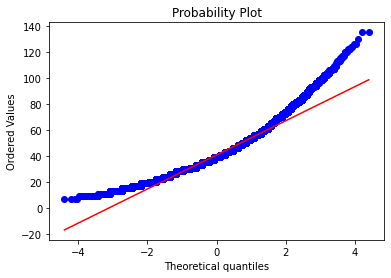

In [21]:
qqplot(df4["WindGustSpeed"])

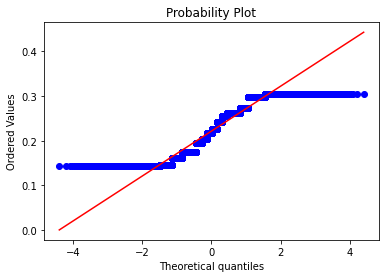

In [22]:
qqplot(df4["WindDir9am"])

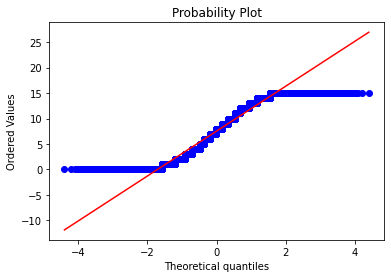

In [23]:
qqplot(df4["WindDir3pm"])

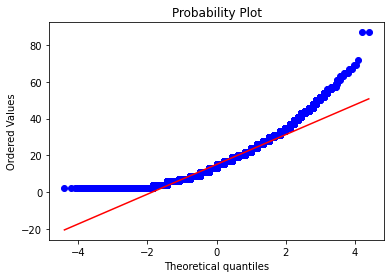

In [24]:
qqplot(df4["WindSpeed9am"])

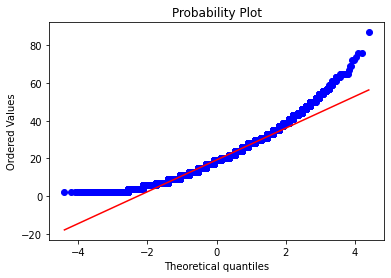

In [25]:
qqplot(df4["WindSpeed3pm"])

In [26]:
# Logarithmic transformation
def logTransformation(df, feature):
    df[feature] = np.log(df[feature] + 1)
    from scipy.stats import probplot
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    print(df[feature])

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


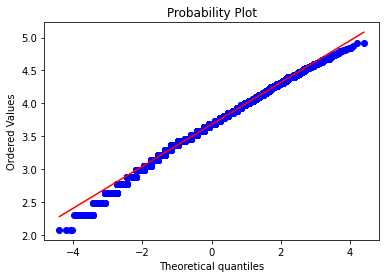

0         3.806662
1         3.806662
2         3.850148
3         3.218876
4         3.737670
            ...   
145454    3.465736
145455    3.465736
145456    3.135494
145457    3.637586
145458    3.367296
Name: WindGustSpeed, Length: 126854, dtype: float64


In [27]:
logTransformation(df4, "WindGustSpeed")

In [28]:
# Exponential transformation
def expTransformation(df, feature):
    df[feature] = np.exp(df[feature])
    from scipy.stats import probplot
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    print(df[feature])

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


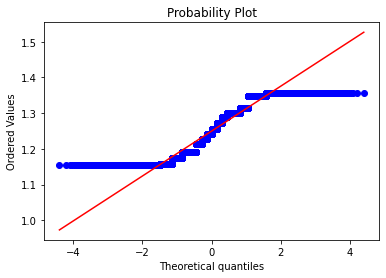

0         1.290455
1         1.355962
2         1.290455
3         1.174153
4         1.190289
            ...   
145454    1.157806
145455    1.174153
145456    1.174153
145457    1.174153
145458    1.192083
Name: WindDir9am, Length: 126854, dtype: float64


In [29]:
expTransformation(df4, "WindDir9am")

In [30]:
# Reciprocal transformation
def reciprocalTransformation(df, feature):
    df[feature] = np.reciprocal(df[feature] + 1)
    from scipy.stats import probplot
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    print(df[feature])

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


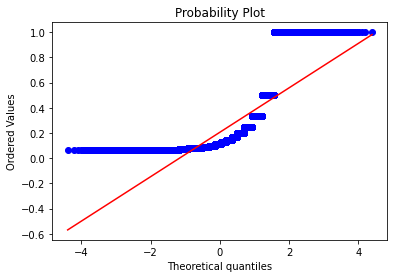

0         0.250000
1         0.142857
2         0.142857
3         0.066667
4         1.000000
            ...   
145454    0.066667
145455    0.071429
145456    0.333333
145457    0.250000
145458    0.333333
Name: WindDir3pm, Length: 126854, dtype: float64


In [31]:
reciprocalTransformation(df4, "WindDir3pm")

In [32]:
# Sqrt transformation
def sqrtTransformation(df, feature):
    df[feature] = np.sqrt(df[feature])
    from scipy.stats import probplot
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    print(df[feature])

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


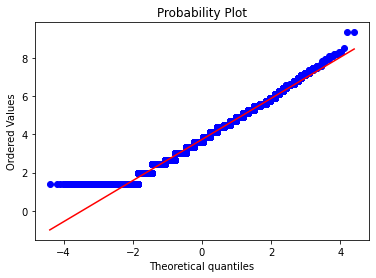

0         4.472136
1         2.000000
2         4.358899
3         3.316625
4         2.645751
            ...   
145454    3.872983
145455    3.605551
145456    3.605551
145457    3.000000
145458    3.605551
Name: WindSpeed9am, Length: 126854, dtype: float64


In [33]:
sqrtTransformation(df4, "WindSpeed9am")

In [34]:
# Box-Cox transformation
def boxcoxTransformation(df, feature):
    from scipy.stats import boxcox
    df[feature] = boxcox(df[feature])[0]
    from scipy.stats import probplot
    probplot(df[feature], dist="norm", plot=plt)
    plt.show()
    print(df[feature])

c:\Users\navya\anaconda3\envs\rainfall\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


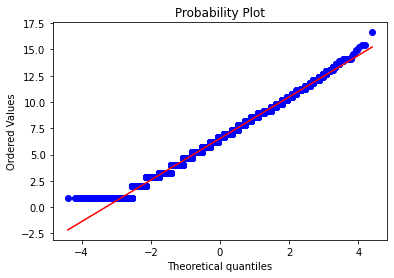

0         7.792200
1         7.375557
2         8.191803
3         3.998079
4         6.939489
            ...   
145454    5.208110
145455    4.630789
145456    3.998079
145457    3.998079
145458    3.290126
Name: WindSpeed3pm, Length: 126854, dtype: float64


In [35]:
boxcoxTransformation(df4, "WindSpeed3pm")